<a href="https://colab.research.google.com/github/KAREN154/PlantPathoDetect-/blob/main/Baseline_cnn_moel_with_augumentated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Libaries
import numpy as np
import pickle
import matplotlib.pyplot as ply
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

#Val data generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_potato = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/PlantPathoDetect-/data/Potato/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_potato = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/PlantPathoDetect-/data/Potato/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

#Test Data Generator
train_datagen = ImageDataGenerator(rescale=1./255)
train_augmented_potato = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/PlantPathoDetect-/data/Potato/Train_augmented',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1282 images belonging to 3 classes.
Found 144 images belonging to 3 classes.
Found 17106 images belonging to 3 classes.


In [ ]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (224, 224, 3)
num_classes = 3  # Changed from 8 to 3 to match tomato dataset

model = build_cnn_model(input_shape, num_classes)

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# # Fitting the model
# history = model.fit(train_tomato, # Changed from train_potato to train_tomato
#                     epochs=10,
#                     validation_data=val_tomato # changed from train_potato to val_tomato
# )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fitting the model
history = model.fit(train_augmented_potato,
                    epochs=10,
                    validation_data=val_potato
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


535/535 ━━━━━━━━━━━━━━━━━━━━ 6904s 13s/step - accuracy: 0.6094 - loss: 0.8621 - val_accuracy: 0.9165 - val_loss: 0.2276
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 1967s 4s/step - accuracy: 0.8540 - loss: 0.3828 - val_accuracy: 0.9649 - val_loss: 0.1012
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 1979s 4s/step - accuracy: 0.9145 - loss: 0.2419 - val_accuracy: 0.9821 - val_loss: 0.0574
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 1946s 4s/step - accuracy: 0.9400 - loss: 0.1738 - val_accuracy: 0.9860 - val_loss: 0.0456
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 2033s 4s/step - accuracy: 0.9518 - loss: 0.1413 - val_accuracy: 0.9938 - val_loss: 0.0244
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 1984s 4s/step - accuracy: 0.9561 - loss: 0.1238 - val_accuracy: 0.9914 - val_loss: 0.0339
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 2004s 4s/step - accuracy: 0.9707 - loss: 0.0877 - val_accuracy: 0.9930 - val_loss: 0.0245
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 2039s 4s/step - accuracy: 0.9714 - loss: 0.0870 - val_accura

In [ ]:
# Evaluating the Test data
results = model.evaluate(test_potato, verbose=0)

print("   Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

NameError: name 'model' is not defined

In [ ]:
# Plotting for accuracy in the model
import matplotlib.pyplot as plt
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [4]:

#Val data generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_tomato = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/PlantPathoDetect-/data/Tomato/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
#Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_tomato = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/PlantPathoDetect-/data/Tomato/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

#Test Data Generator
train_datagen = ImageDataGenerator(rescale=1./255)
train_augmented_tomato = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/PlantPathoDetect-/data/Tomato/Train_augmented',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2495 images belonging to 6 classes.
Found 280 images belonging to 6 classes.
Found 33315 images belonging to 6 classes.


In [5]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (224, 224, 3)
num_classes = 6  # Changed from 3 to 6 to match the actual number of classes in train_tomato

model = build_cnn_model(input_shape, num_classes)

# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Calculate steps per epoch
steps_per_epoch = len(train_augmented_tomato) // train_augmented_tomato.batch_size
validation_steps = len(val_tomato) // val_tomato.batch_size

# Fitting the model with reduced iterations
history = model.fit(
    train_augmented_tomato,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=val_tomato,
    validation_steps=validation_steps
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 369s 9s/step - accuracy: 0.6162 - loss: 1.0495 - val_accuracy: 0.7344 - val_loss: 0.7436
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 271s 9s/step - accuracy: 0.6257 - loss: 1.0074 - val_accuracy: 0.6719 - val_loss: 0.7626
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 248s 8s/step - accuracy: 0.5926 - loss: 1.1048 - val_accuracy: 0.7031 - val_loss: 0.8178
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 258s 8s/step - accuracy: 0.5916 - loss: 1.0705 - val_accuracy: 0.8125 - val_loss: 0.6006
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 250s 8s/step - accuracy: 0.6157 - loss: 0.9942 - val_accuracy: 0.7812 - val_loss: 0.5822
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 235s 7s/step - accuracy: 0.6651 - loss: 0.9475 - val_accuracy: 0.7656 - val_loss: 0.6407
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 244s 8s/step - accuracy: 0.6389 - loss: 0.9474 - val_accuracy: 0.7500 - val_loss: 0.7191
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 237s 7s/step - accuracy: 0.6316 - loss: 0.9277 - val_accuracy: 0.7656 - v

In [8]:
# Evaluating the Test data
results = model.evaluate(test_tomato, verbose=0)

print("   Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   Test Loss: 0.64458
Test Accuracy: 73.93%


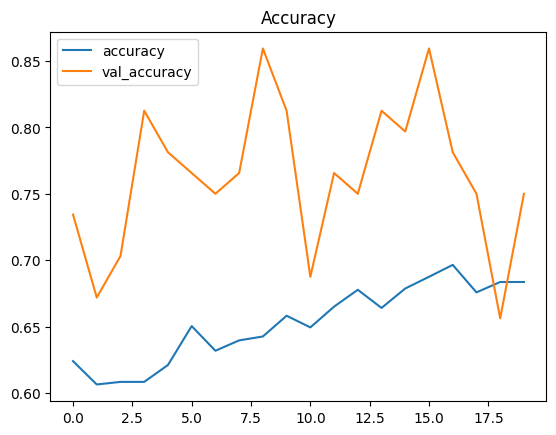

In [9]:
# Plotting for accuracy in the model
import matplotlib.pyplot as plt
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()